

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [2]:

import pickle
with open('E:/applied ai course/decision trees/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [3]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93
#print(ss)

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [1]:
import pandas
data = pandas.read_csv('E:/applied ai course/decision trees/preprocessed_data.csv',nrows=50000)

In [7]:
Y = data['project_is_approved']
X = data.drop('project_is_approved', axis=1)
import numpy as np
def sentiment_score(X,feature):
  neg=[]
  neu=[]
  pos=[]
  compound=[]
  sid = SentimentIntensityAnalyzer()
  for i in range(len(X)):
    for_sentiment = X[feature].iloc[i]
    ss = sid.polarity_scores(for_sentiment)
    neg.append(ss['neg'])
    neu.append(ss['neu'])
    pos.append(ss['pos'])
    compound.append(ss['compound'])
  return np.asarray(neg).reshape(-1,1),np.asarray(neu).reshape(-1,1),np.asarray(pos).reshape(-1,1),np.asarray(compound).reshape(-1,1)



negative,neutral,positive,compound = sentiment_score(X,"essay")
X["sen_neg"]=negative
X["sen_pos"]=positive
X["sen_neu"]=neutral
X["sen_comp"]=compound
print(negative.shape)
print((X["sen_neg"][0:24500]).shape)

(50000, 1)
(24500,)


In [3]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.model_selection import train_test_split
y=data['project_is_approved'].values
X=data.drop(['project_is_approved'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,stratify=y)
print(y_train.shape)

(35000,)


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=TfidfVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
X_train_tfidf=vectorizer.fit_transform(X_train['essay'].values)

X_test_tfidf=vectorizer.transform(X_test['essay'].values)

# TFIDF-W2V

In [13]:
from tqdm import tqdm

tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 35000/35000 [02:23<00:00, 244.27it/s]

35000
300


In [14]:
'''
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_cv['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))
'''

"\ntfidf_model = TfidfVectorizer()\ntfidf_model.fit(X_cv['essay'].values)\n# we are converting a dictionary with word as a key, and the idf as a value\ndictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))\ntfidf_words = set(tfidf_model.get_feature_names())\n\ntfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list\nfor sentence in tqdm(X_cv['essay'].values): # for each review/sentence\n    vector = np.zeros(300) # as word vectors are of zero length\n    tf_idf_weight =0; # num of words with a valid vector in the sentence/review\n    for word in sentence.split(): # for each word in a review/sentence\n        if (word in glove_words) and (word in tfidf_words):\n            vec = model[word] # getting the vector for each word\n            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))\n            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.spl

In [15]:
#tfidf_model = TfidfVectorizer()
#tfidf_model.transform(X_test['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
#dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
#tfidf_words = set(tfidf_model.get_feature_names())

tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 15000/15000 [01:03<00:00, 237.78it/s]

15000
300


# encoding categorical features: School State

In [16]:
vectorizer=CountVectorizer()
X_train_state_ohe=vectorizer.fit_transform(X_train['school_state'].values)
#X_cv_state_ohe=vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe=vectorizer.transform(X_test['school_state'].values)
#l.extend(vectorizer.get_feature_names())
print(vectorizer.get_feature_names())

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


# encoding categorical features: teacher prefix

In [17]:
vectorizer=CountVectorizer()
X_train_teacher_ohe=vectorizer.fit_transform(X_train['teacher_prefix'].values)
#X_cv_teacher_ohe=vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe=vectorizer.transform(X_test['teacher_prefix'].values)
#l.extend(vectorizer.get_feature_names())
print(vectorizer.get_feature_names())

['dr', 'mr', 'mrs', 'ms', 'teacher']


# encoding categorical features: project_grade_category

In [18]:
vectorizer=CountVectorizer()
X_train_grade_ohe=vectorizer.fit_transform(X_train['project_grade_category'].values)
#X_cv_grade_ohe=vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe=vectorizer.transform(X_test['project_grade_category'].values)
#l.extend(vectorizer.get_feature_names())
print(vectorizer.get_feature_names())

['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


# encoding categorical features: clean_categories

In [19]:
vectorizer=CountVectorizer()
X_train_clean_categories_ohe=vectorizer.fit_transform(X_train['clean_categories'].values)
#X_cv_clean_categories_ohe=vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_categories_ohe=vectorizer.transform(X_test['clean_categories'].values)
#l.extend(vectorizer.get_feature_names())
print(vectorizer.get_feature_names())

['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


# encoding categorical features: clean_subcategories

In [20]:
vectorizer=CountVectorizer()
X_train_clean_subcategories_ohe=vectorizer.fit_transform(X_train['clean_subcategories'].values)
#X_cv_clean_subcategories_ohe=vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_ohe=vectorizer.transform(X_test['clean_subcategories'].values)
#l.extend(vectorizer.get_feature_names())
print(vectorizer.get_feature_names())

['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


# encoding numerical features: Price

In [21]:
from sklearn.preprocessing import Normalizer
normalizer=Normalizer()
X_train_price_norm=normalizer.fit_transform(X_train['price'].values.reshape(1,-1))
#X_cv_price_norm=normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm=normalizer.transform(X_test['price'].values.reshape(1,-1))
print(X_train_price_norm.shape, y_train.shape)
#print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
X_train_price_norm=X_train_price_norm.reshape(-1,1)
#X_cv_price_norm=X_cv_price_norm.reshape(-1,1)
X_test_price_norm=X_test_price_norm.reshape(-1,1)
print('After reshaping')
print(X_train_price_norm.shape, y_train.shape)
#print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
#l.append('price')

(1, 35000) (35000,)
(1, 15000) (15000,)
After reshaping
(35000, 1) (35000,)
(15000, 1) (15000,)


# encoding numerical features: teacher_number_of_previously_posted_projects

In [22]:
normalizer=Normalizer()
X_train_previously_posted_projects_norm=normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
#X_cv_previously_posted_projects_norm=normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_previously_posted_projects_norm=normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
print(X_train_previously_posted_projects_norm.shape, y_train.shape)
#print(X_cv_previously_posted_projects_norm.shape, y_cv.shape)
print(X_test_previously_posted_projects_norm.shape, y_test.shape)
X_train_previously_posted_projects_norm=X_train_previously_posted_projects_norm.reshape(-1,1)
#X_cv_previously_posted_projects_norm=X_cv_previously_posted_projects_norm.reshape(-1,1)
X_test_previously_posted_projects_norm=X_test_previously_posted_projects_norm.reshape(-1,1)
print('After reshaping')
print(X_train_previously_posted_projects_norm.shape, y_train.shape)
#print(X_cv_previously_posted_projects_norm.shape, y_cv.shape)
print(X_test_previously_posted_projects_norm.shape, y_test.shape)
#l.append('teacher_number_of_previously_posted_projects')

(1, 35000) (35000,)
(1, 15000) (15000,)
After reshaping
(35000, 1) (35000,)
(15000, 1) (15000,)


In [25]:
from scipy.sparse import hstack
X_tr_tfidf=hstack((X_train_tfidf,X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_clean_categories_ohe,X_train_clean_subcategories_ohe,X_train_price_norm,X_train_previously_posted_projects_norm,negative[0:35000],positive[0:35000],neutral[0:35000],compound[0:35000])).tocsr()
#X_ce_tfidf=hstack((X_cv_tfidf,X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe,X_cv_price_norm,X_cv_previously_posted_projects_norm,negative[24500:35000],positive[24500:35000],neutral[24500:35000],compound[24500:35000])).tocsr()
X_te_tfidf=hstack((X_test_tfidf,X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_price_norm,X_test_previously_posted_projects_norm,negative[35000:50000],positive[35000:50000],neutral[35000:50000],compound[35000:50000])).tocsr()
X_tr_tfidfw2v=hstack((tfidf_w2v_vectors_train,X_train_state_ohe,X_train_teacher_ohe,X_train_grade_ohe,X_train_clean_categories_ohe,X_train_clean_subcategories_ohe,X_train_price_norm,X_train_previously_posted_projects_norm,negative[0:35000],positive[0:35000],neutral[0:35000],compound[0:35000])).tocsr()
#X_ce_tfidfw2v=hstack((tfidf_w2v_vectors_cv,X_cv_state_ohe,X_cv_teacher_ohe,X_cv_grade_ohe,X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe,X_cv_price_norm,X_cv_previously_posted_projects_norm,negative[24500:35000],positive[24500:35000],neutral[24500:35000],compound[24500:35000])).tocsr()
X_te_tfidfw2v=hstack((tfidf_w2v_vectors_test,X_test_state_ohe,X_test_teacher_ohe,X_test_grade_ohe,X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_price_norm,X_test_previously_posted_projects_norm,negative[35000:50000],positive[35000:50000],neutral[35000:50000],compound[35000:50000])).tocsr()

In [26]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
max_depth= [1, 5, 10, 50] 
min_samples_split= [5, 10, 100, 500]
params={'max_depth':max_depth,'min_samples_split':min_samples_split}
DT=DecisionTreeClassifier(class_weight = 'balanced')
clf=GridSearchCV(DT,params,cv=5,return_train_score=True, scoring='roc_auc')
clf.fit(X_tr_tfidf,y_train)
results=pd.DataFrame.from_dict(clf.cv_results_)
print(results.head)
train_auc=results['mean_train_score']
train_auc_std=results['std_train_score']
cv_auc=results['mean_test_score']
cv_auc_std=results['std_test_score']
results=results.sort_values(['param_max_depth'])
results=results.sort_values(['param_min_samples_split'])
print(results.head)
N=results['param_max_depth']
k=results['param_min_samples_split']
plt.plot(( N), train_auc, label='Train AUC')
plt.plot((N), cv_auc, label='CV AUC')
plt.scatter((N), train_auc, label='Train AUC Points')
plt.scatter((N), cv_auc, label='CV AUC poiints')

plt.legend()
plt.xlabel('DT: hyperparameter')
plt.ylabel('AUC')
plt.title('Hyperparameter vs AUC plot')
plt.plot(( k), train_auc, label='Train AUC')
plt.plot((k), cv_auc, label='CV AUC')
plt.scatter((k), train_auc, label='Train AUC Points')
plt.scatter((k), cv_auc, label='CV AUC poiints')

plt.legend()
plt.xlabel('DT: hyperparameter')
plt.ylabel('AUC')
plt.title('Hyperparameter vs AUC plot')

plt.grid()
plt.show()

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



<bound method NDFrame.head of     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.865799      0.127345         0.017589    6.340371e-03   
1        0.811298      0.035551         0.014191    7.468381e-04   
2        0.853708      0.031476         0.014592    1.741979e-03   
3        0.877257      0.035205         0.014790    2.133274e-03   
4        3.321342      0.110888         0.013791    4.011156e-04   
5        3.201615      0.025974         0.013991    6.319575e-04   
6        3.192020      0.063015         0.013991    6.321082e-04   
7        3.175831      0.122302         0.013991    3.162980e-07   
8        9.029203      0.297080         0.015191    2.398539e-03   
9        8.775159      0.177740         0.014191    4.000190e-04   
10       7.829745      0.107795         0.013992    7.747687e-07   
11       6.286503      0.064979         0.013991    1.907349e-07   
12      42.288583      1.621115         0.015390    4.894928e-04   
13      40.259439 

<Figure size 640x480 with 1 Axes>

In [27]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np


x1 = N
y1 = k
z1 = train_auc

x2 = N
y2 = k
z2 = cv_auc

trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [28]:
def batch_predict(clf,data):
    y_data_pred=[]
    tr_loop=data.shape[0]-data.shape[0]%1000
    for i in range(0,tr_loop,1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [29]:
best_depth=5
best_min_sample_split=10

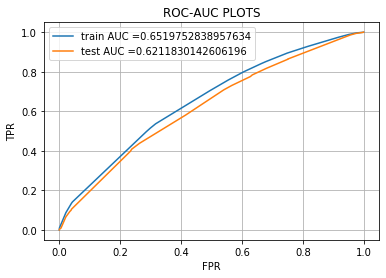

In [30]:
from sklearn.metrics import roc_curve,auc
DT=DecisionTreeClassifier(max_depth=best_depth,min_samples_split=best_min_sample_split,class_weight = 'balanced')
DT.fit(X_tr_tfidf,y_train)
y_train_pred = batch_predict(DT, X_tr_tfidf)    
y_test_pred = batch_predict(DT, X_te_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC PLOTS")
plt.grid()
plt.show()


the maximum value of tpr*(1-fpr) 0.3669188886371744 thershold 0.555
Test Confusion matrix
[[1769  633]
 [7078 5520]]


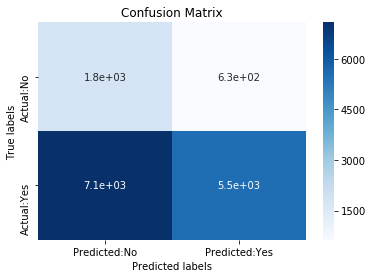

In [31]:
def find_best_thershold(thershold,fpr,tpr):
    t=thershold[np.argmax(tpr*(1-fpr))]
    print('the maximum value of tpr*(1-fpr)',max(tpr*(1-fpr)),'thershold',np.round(t,3))
    return t
def predict_with_best_t(proba,thershold):
    predictions=[]
    i=0
    for i in proba:
        if i>=thershold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
print('='*100)
from sklearn.metrics import confusion_matrix
best_t=find_best_thershold(tr_thresholds,train_fpr,train_tpr)
print("Test Confusion matrix")
print(confusion_matrix(y_test,predict_with_best_t(y_test_pred,best_t)))
cm = confusion_matrix(y_test,predict_with_best_t(y_test_pred,best_t))
ax= plt.subplot();
sns.heatmap(cm, annot=True,cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.yaxis.set_ticklabels(['Actual:No','Actual:Yes']); 
ax.xaxis.set_ticklabels(['Predicted:No','Predicted:Yes']);



In [32]:
#print(y_test_pred)
thershold=best_t
y_predicted=predict_with_best_t(y_test_pred,thershold)
print(len(y_predicted))

15000


In [33]:

FN=pd.DataFrame({"Actual":y_test, "Predicted":y_predicted})
FN_indexs=list(FN[(FN["Actual"]==0) & (FN["Predicted"]==1)].index)
print(len(FN_indexs))


633


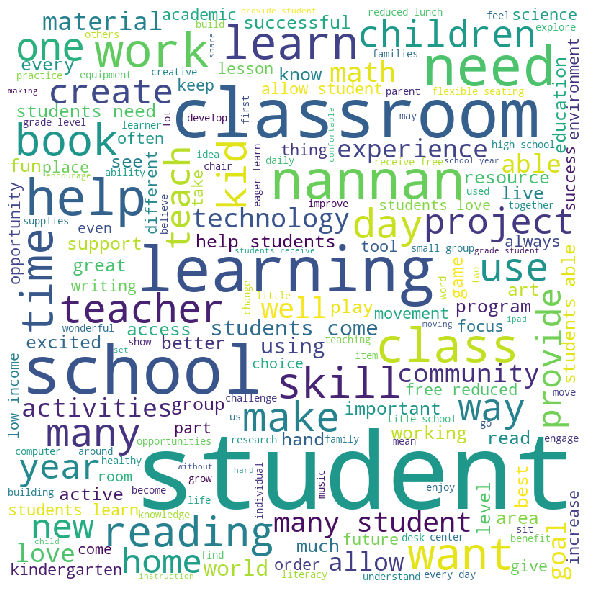

In [34]:

from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
m=0
Essay_Tests=""
for m in FN_indexs:
    Essay_Tests+=" {}".format(X_test.iloc[m]['essay'])
#print(len(Essay_Tests))
Essay_Tests=Essay_Tests.split()
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in Essay_Tests : 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 



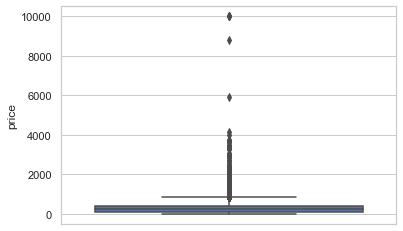

In [35]:
price=[]
i=0
for i in FN_indexs:
    price.append(X_test.iloc[i]['price'])
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(y="price", hue=price, data=X_test)

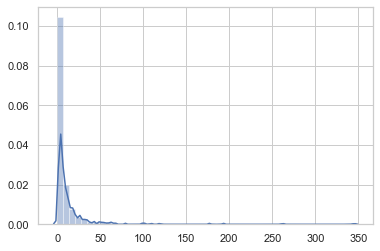

In [36]:
teacher_number_of_previously_posted_projects=[]
i=0
for i in FN_indexs:
    teacher_number_of_previously_posted_projects.append(X_test.iloc[i]['teacher_number_of_previously_posted_projects'])
ax = sns.distplot(teacher_number_of_previously_posted_projects)

# For TFIDFW2V

<bound method NDFrame.head of     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.865799      0.127345         0.017589    6.340371e-03   
1        0.811298      0.035551         0.014191    7.468381e-04   
2        0.853708      0.031476         0.014592    1.741979e-03   
3        0.877257      0.035205         0.014790    2.133274e-03   
4        3.321342      0.110888         0.013791    4.011156e-04   
5        3.201615      0.025974         0.013991    6.319575e-04   
6        3.192020      0.063015         0.013991    6.321082e-04   
7        3.175831      0.122302         0.013991    3.162980e-07   
8        9.029203      0.297080         0.015191    2.398539e-03   
9        8.775159      0.177740         0.014191    4.000190e-04   
10       7.829745      0.107795         0.013992    7.747687e-07   
11       6.286503      0.064979         0.013991    1.907349e-07   
12      42.288583      1.621115         0.015390    4.894928e-04   
13      40.259439 

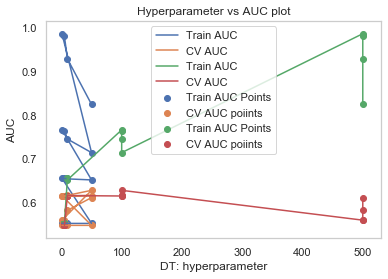

In [37]:
# For tfidfw2v
max_depth= [1, 5, 10, 50] 
min_samples_split= [5, 10, 100, 500]
params={'max_depth':max_depth,'min_samples_split':min_samples_split}
DT_tfidfw2v=DecisionTreeClassifier(class_weight = 'balanced')
clf_tfidfw2v=GridSearchCV(DT_tfidfw2v,params,cv=5,return_train_score=True, scoring='roc_auc')
clf_tfidfw2v.fit(X_tr_tfidfw2v,y_train)
results_tfidfw2v=pd.DataFrame.from_dict(clf.cv_results_)
print(results_tfidfw2v.head)
train_auc=results_tfidfw2v['mean_train_score']
train_auc_std=results_tfidfw2v['std_train_score']
cv_auc=results_tfidfw2v['mean_test_score']
cv_auc_std=results_tfidfw2v['std_test_score']
results_tfidfw2v=results_tfidfw2v.sort_values(['param_max_depth'])
results_tfidfw2v=results_tfidfw2v.sort_values(['param_min_samples_split'])
print(results_tfidfw2v.head)
N=results_tfidfw2v['param_max_depth']
k=results_tfidfw2v['param_min_samples_split']
plt.plot(( N), train_auc, label='Train AUC')
plt.plot((N), cv_auc, label='CV AUC')
plt.scatter((N), train_auc, label='Train AUC Points')
plt.scatter((N), cv_auc, label='CV AUC poiints')

plt.legend()
plt.xlabel('DT: hyperparameter')
plt.ylabel('AUC')
plt.title('Hyperparameter vs AUC plot')
plt.plot(( k), train_auc, label='Train AUC')
plt.plot((k), cv_auc, label='CV AUC')
plt.scatter((k), train_auc, label='Train AUC Points')
plt.scatter((k), cv_auc, label='CV AUC poiints')

plt.legend()
plt.xlabel('DT: hyperparameter')
plt.ylabel('AUC')
plt.title('Hyperparameter vs AUC plot')

plt.grid()
plt.show()

In [38]:
x1 = N
y1 = k
z1 = train_auc

x2 = N
y2 = k
z2 = cv_auc

trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [39]:
best_depth=5
best_min_sample_split=10

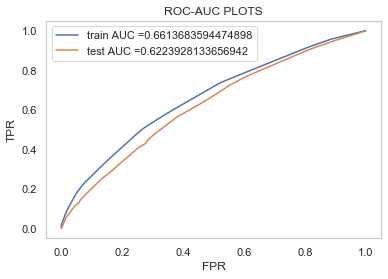

In [40]:
DT_tfidfw2v=DecisionTreeClassifier(max_depth=best_depth,min_samples_split=best_min_sample_split,class_weight = 'balanced')
DT_tfidfw2v.fit(X_tr_tfidfw2v,y_train)
y_train_pred = batch_predict(DT_tfidfw2v, X_tr_tfidfw2v)    
y_test_pred = batch_predict(DT_tfidfw2v, X_te_tfidfw2v)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC PLOTS")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.37998881699767795 thershold 0.485
Test Confusion matrix
[[1487  915]
 [5482 7116]]


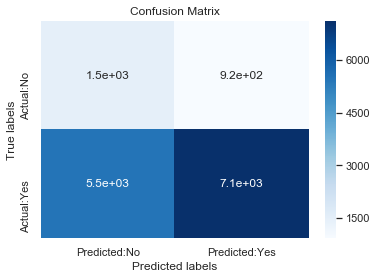

In [41]:
best_t=find_best_thershold(tr_thresholds,train_fpr,train_tpr)
print("Test Confusion matrix")
print(confusion_matrix(y_test,predict_with_best_t(y_test_pred,best_t)))
cm = confusion_matrix(y_test,predict_with_best_t(y_test_pred,best_t))
ax= plt.subplot();
sns.heatmap(cm, annot=True,cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.yaxis.set_ticklabels(['Actual:No','Actual:Yes']); 
ax.xaxis.set_ticklabels(['Predicted:No','Predicted:Yes']);


In [42]:
thershold=best_t
y_predicted=predict_with_best_t(y_test_pred,thershold)
print(len(y_predicted))

15000


In [43]:
FN_tfidfw2v=pd.DataFrame({"Actual":y_test, "Predicted":y_predicted})
FN_tfidfw2v_indexs=list(FN[(FN["Actual"]==0) & (FN["Predicted"]==1)].index)
print(len(FN_tfidfw2v_indexs))


633


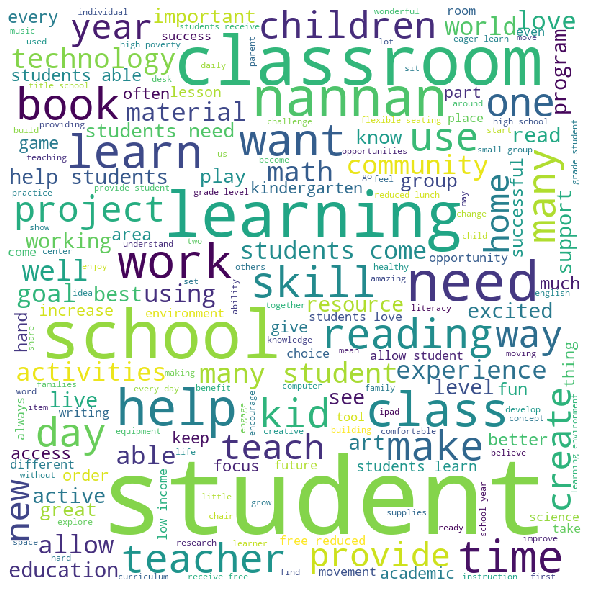

In [44]:
m=0
Essay_Tests=""
for m in FN_tfidfw2v_indexs:
    Essay_Tests+=" {}".format(X_test.iloc[m]['essay'])
#print(len(Essay_Tests))
Essay_Tests=Essay_Tests.split()
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in Essay_Tests : 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


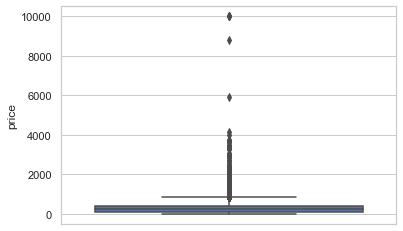

In [45]:
price=[]
i=0
for i in FN_tfidfw2v_indexs:
    price.append(X_test.iloc[i]['price'])
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(y="price", hue=price, data=X_test)

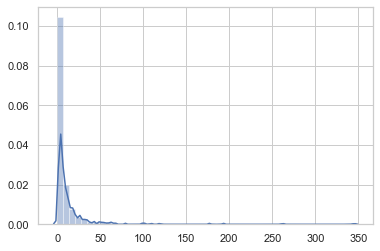

In [46]:
teacher_number_of_previously_posted_projects=[]
i=0
for i in FN_tfidfw2v_indexs:
    teacher_number_of_previously_posted_projects.append(X_test.iloc[i]['teacher_number_of_previously_posted_projects'])
ax = sns.distplot(teacher_number_of_previously_posted_projects)

In [47]:
DT_new=DecisionTreeClassifier(max_depth=None,min_samples_split=10,class_weight='balanced')
DT_new.fit(X_tr_tfidf,y_train)

DecisionTreeClassifier(class_weight='balanced', min_samples_split=10)

In [48]:
c=(DT_new.feature_importances_)[:5000]
#feature_importances = pd.DataFrame(DT.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(c)
d=np.where(c!=0)[0]
#d=list(d)
print(d)
print(type(d))

[0.         0.00018809 0.         ... 0.         0.00013403 0.00013578]
[   1    5    9 ... 4994 4998 4999]
<class 'numpy.ndarray'>


In [50]:
x_train_tfidf=X_train_tfidf[:,d]
#x_cv_tfidf=X_cv_tfidf[:,d]
x_test_tfidf=X_test_tfidf[:,d]

In [51]:
print(x_train_tfidf.shape)

(35000, 1688)


<bound method NDFrame.head of     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.482102      0.024681         0.040372        0.001958   
1        0.481300      0.028768         0.042574        0.005709   
2        0.514681      0.055412         0.041774        0.003760   
3        0.482901      0.024911         0.041174        0.002482   
4        2.370330      0.294287         0.045572        0.007679   
5        2.161860      0.127221         0.038976        0.000632   
6        2.515040      0.844610         0.040775        0.002637   
7        3.805039      1.011707         0.060362        0.007168   
8        7.559914      1.629623         0.042574        0.003261   
9        6.192161      1.031393         0.044372        0.008795   
10       6.545343      1.073017         0.046371        0.007084   
11       6.906517      0.492635         0.043575        0.006279   
12      33.994843      4.659010         0.044572        0.007706   
13      27.923888 

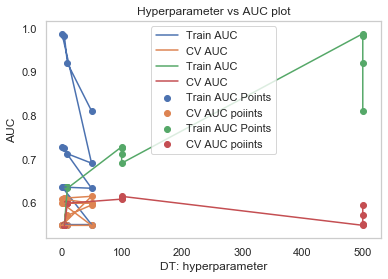

In [52]:
max_depth= [1, 5, 10, 50] 
min_samples_split= [5, 10, 100, 500]
params={'max_depth':max_depth,'min_samples_split':min_samples_split}
DT=DecisionTreeClassifier(class_weight = 'balanced')
clf=GridSearchCV(DT,params,cv=5,return_train_score=True, scoring='roc_auc')
clf.fit(x_train_tfidf,y_train)
results=pd.DataFrame.from_dict(clf.cv_results_)
print(results.head)
train_auc=results['mean_train_score']
train_auc_std=results['std_train_score']
cv_auc=results['mean_test_score']
cv_auc_std=results['std_test_score']
results=results.sort_values(['param_max_depth'])
results=results.sort_values(['param_min_samples_split'])
print(results.head)
N=results['param_max_depth']
k=results['param_min_samples_split']
plt.plot(( N), train_auc, label='Train AUC')
plt.plot((N), cv_auc, label='CV AUC')
plt.scatter((N), train_auc, label='Train AUC Points')
plt.scatter((N), cv_auc, label='CV AUC poiints')

plt.legend()
plt.xlabel('DT: hyperparameter')
plt.ylabel('AUC')
plt.title('Hyperparameter vs AUC plot')
plt.plot(( k), train_auc, label='Train AUC')
plt.plot((k), cv_auc, label='CV AUC')
plt.scatter((k), train_auc, label='Train AUC Points')
plt.scatter((k), cv_auc, label='CV AUC poiints')

plt.legend()
plt.xlabel('DT: hyperparameter')
plt.ylabel('AUC')
plt.title('Hyperparameter vs AUC plot')

plt.grid()
plt.show()

In [53]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np


x1 = N
y1 = k
z1 = train_auc

x2 = N
y2 = k
z2 = cv_auc

trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [54]:
best_depth=5
best_min_sample_split=10

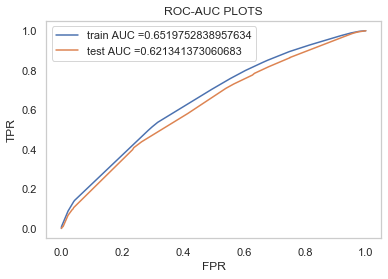

In [55]:
DT=DecisionTreeClassifier(max_depth=best_depth,min_samples_split=best_min_sample_split,class_weight = 'balanced')
DT.fit(X_tr_tfidf,y_train)
y_train_pred = batch_predict(DT, X_tr_tfidf)    
y_test_pred = batch_predict(DT, X_te_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-AUC PLOTS")
plt.grid()
plt.show()


the maximum value of tpr*(1-fpr) 0.3669188886371744 thershold 0.555
Test Confusion matrix
[[1769  633]
 [7076 5522]]


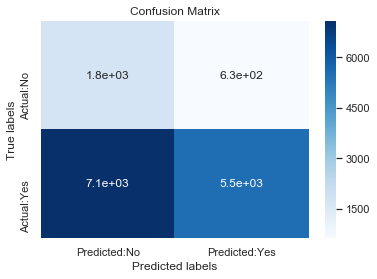

In [56]:
best_t=find_best_thershold(tr_thresholds,train_fpr,train_tpr)
print("Test Confusion matrix")
print(confusion_matrix(y_test,predict_with_best_t(y_test_pred,best_t)))
cm = confusion_matrix(y_test,predict_with_best_t(y_test_pred,best_t))
ax= plt.subplot();
sns.heatmap(cm, annot=True,cmap='Blues',ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');
ax.yaxis.set_ticklabels(['Actual:No','Actual:Yes']); 
ax.xaxis.set_ticklabels(['Predicted:No','Predicted:Yes']);



In [57]:
thershold=best_t
y_predicted=predict_with_best_t(y_test_pred,thershold)
print(len(y_predicted))

15000


In [58]:
FN=pd.DataFrame({"Actual":y_test, "Predicted":y_predicted})
FN_indexs=list(FN[(FN["Actual"]==0) & (FN["Predicted"]==1)].index)
print(len(FN_indexs))


633


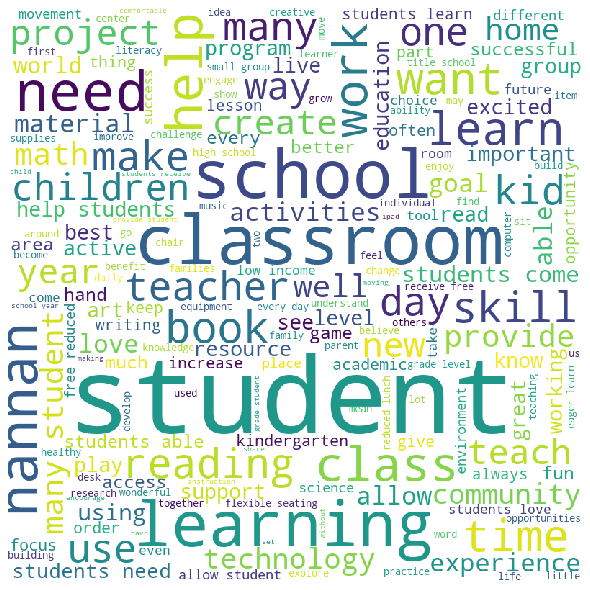

In [59]:
m=0
Essay_Tests=""
for m in FN_indexs:
    Essay_Tests+=" {}".format(X_test.iloc[m]['essay'])
#print(len(Essay_Tests))
Essay_Tests=Essay_Tests.split()
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in Essay_Tests : 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 



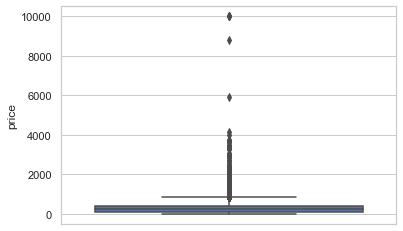

In [60]:
price=[]
i=0
for i in FN_indexs:
    price.append(X_test.iloc[i]['price'])
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(y="price", hue=price, data=X_test)

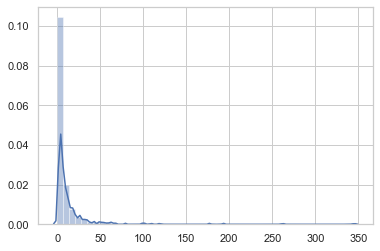

In [61]:
teacher_number_of_previously_posted_projects=[]
i=0
for i in FN_indexs:
    teacher_number_of_previously_posted_projects.append(X_test.iloc[i]['teacher_number_of_previously_posted_projects'])
ax = sns.distplot(teacher_number_of_previously_posted_projects)

# Summary

In [63]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=['Vectorizer','Model','Hyper parameter','AUC']
x.add_row(['TFIDF','DECISION TREE','best_depth=5 best_min_sample_split=10',0.62])
x.add_row(['TFIDFW2V','DECISION TREE','best_depth=5 best_min_sample_split=10',0.62])
print(x)

+------------+---------------+---------------------------------------+------+
| Vectorizer |     Model     |            Hyper parameter            | AUC  |
+------------+---------------+---------------------------------------+------+
|   TFIDF    | DECISION TREE | best_depth=5 best_min_sample_split=10 | 0.62 |
|  TFIDFW2V  | DECISION TREE | best_depth=5 best_min_sample_split=10 | 0.62 |
+------------+---------------+---------------------------------------+------+
